In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from io import StringIO

In [2]:
csv_data = '''A,B,C,D,E
            5.0,2.0,3.0,,6
            1.0,6.0,,8.0,5
            0.0,11.0,12.0,4.0,5
            3.0,,3.0,5.0
            5.0,1.0,4.0,2.0,4
            '''

In [3]:
df = pd.read_csv(StringIO(csv_data))

In [4]:
df

,A,B,C,D,E
0,5.0,2.0,3.0,NaN,6.0
1,1.0,6.0,NaN,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,NaN,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0


# Missing Data (空值資料處理)

In [5]:
#把有 NaN 的那一行資料丟掉
df.dropna()

,A,B,C,D,E
2,0.0,11.0,12.0,4.0,5.0
4,5.0,1.0,4.0,2.0,4.0


In [6]:
#如果每一欄的同一行都是 NaN 才會丟掉
df.dropna(how='all')

,A,B,C,D,E
0,5.0,2.0,3.0,NaN,6.0
1,1.0,6.0,NaN,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,NaN,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0


In [7]:
#指定欄位空的就丟掉那一行
df.dropna(subset=['C'])

,A,B,C,D,E
0,5.0,2.0,3.0,NaN,6.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,NaN,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0


In [8]:
#填補空缺值加指定參數
df.fillna(0)

,A,B,C,D,E
0,5.0,2.0,3.0,0.0,6.0
1,1.0,6.0,0.0,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,0.0,3.0,5.0,0.0
4,5.0,1.0,4.0,2.0,4.0


In [9]:
#補平均值
print(df['B'].mean())
df['B'] = df['B'].fillna(df['B'].mean())
df

5.0


,A,B,C,D,E
0,5.0,2.0,3.0,NaN,6.0
1,1.0,6.0,NaN,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,5.0,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0


In [10]:
#補眾數
df['C'] = df['C'].fillna(df['C'].mode()[0])
df

,A,B,C,D,E
0,5.0,2.0,3.0,NaN,6.0
1,1.0,6.0,3.0,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,5.0,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0


In [11]:
#補中位數
df['D'] = df['D'].fillna(df['D'].median())
df

,A,B,C,D,E
0,5.0,2.0,3.0,4.5,6.0
1,1.0,6.0,3.0,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,5.0,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0


In [12]:
#補最小值
df['E'] = df['E'].fillna(df['E'].min())
df

,A,B,C,D,E
0,5.0,2.0,3.0,4.5,6.0
1,1.0,6.0,3.0,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,5.0,3.0,5.0,4.0
4,5.0,1.0,4.0,2.0,4.0


# Categorical Data (類別資料處理)

分成有序跟無序，像是XL,L,M,S,XS是有序的。 <br><br/>
男生、女生、第三性就是無序。<br><br/>
無序的方法就要透過one-hot encoding去解決。<br><br/>
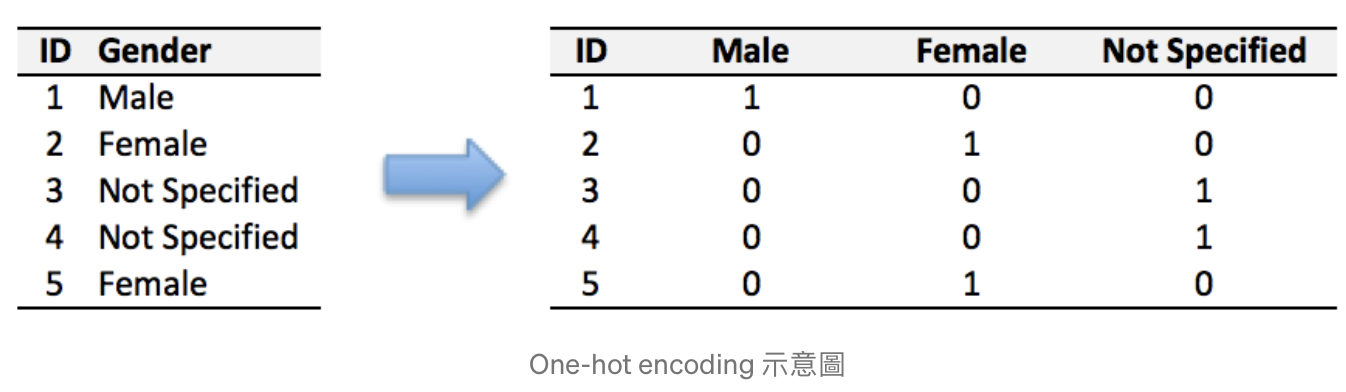

In [13]:
df2 = pd.DataFrame(
    [['green','M',10.1,1],
    ['red','L',13.5,2], 
    ['blue','XL',15.3,1]]
)
df2.columns = ['color','size','price','capturelasslabel']
df2

,color,size,price,capturelasslabel
0,green,M,10.1,1
1,red,L,13.5,2
2,blue,XL,15.3,1


In [14]:
#將size轉換成數字
size_mapping = {
    'XL' : 3,
    'L' : 2,
    'M' : 1
}
df2['size'] = df2['size'].map(size_mapping) #要用 map 作轉換不行用 apply
df2

,color,size,price,capturelasslabel
0,green,1,10.1,1
1,red,2,13.5,2
2,blue,3,15.3,1


In [15]:
#one-hot enconding
pd.get_dummies(df2['color'])

,blue,green,red
0,0,1,0
1,0,0,1
2,1,0,0


In [16]:
#one-hot enconding 並存到 onehot_encoding，prefix使命名時前面多加字
onehot_encoding = pd.get_dummies(df2['color'], prefix='color') 

In [17]:
df2 = df2.drop('color', 1)#把 color 丟掉，第二個參數 0 是代表index 1是代表欄
df2

,size,price,capturelasslabel
0,1,10.1,1
1,2,13.5,2
2,3,15.3,1


In [18]:
#剛剛的one-hot encoding的值加進原本的dataframe
pd.concat([onehot_encoding,df2],axis=1)

,color_blue,color_green,color_red,size,price,capturelasslabel
0,0,1,0,1,10.1,1
1,0,0,1,2,13.5,2
2,1,0,0,3,15.3,1


# 資料正規化 (Normalization)

Feature的scale的保持在一定的範圍，不然在做ML的時候會訓練很慢。<br></br> 
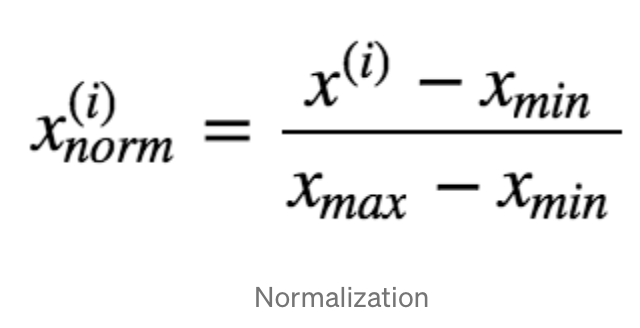

In [19]:
from IPython.display import Math

In [20]:
Math(r'x^{(i)}_{norm}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}')

<IPython.core.display.Math object>

In [21]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'],columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target_names'])
data = pd.concat([x,y], axis=1)
data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [22]:
#正規化花萼的長度
data['sepal length (cm)'] = (data['sepal length (cm)'] - data['sepal length (cm)'].min())/\
                            (data['sepal length (cm)'].max() - data['sepal length (cm)'].min())
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,0.222222,3.5,1.4,0.2,0
1,0.166667,3.0,1.4,0.2,0
2,0.111111,3.2,1.3,0.2,0
3,0.083333,3.1,1.5,0.2,0
4,0.194444,3.6,1.4,0.2,0


# 資料標準化 (Standardization)

In [23]:
Math(r'x^{(i)}_{std}=\frac{x^{(i)}-\mu_{x}}{\sigma_{x}}')

<IPython.core.display.Math object>

In [24]:
data['sepal width (cm)'] = (data['sepal width (cm)']-data['sepal width (cm)'].mean())/\
                            (data['sepal width (cm)'].std())
data.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,0.222222,1.015602,1.4,0.2,0
1,0.166667,-0.131539,1.4,0.2,0
2,0.111111,0.327318,1.3,0.2,0
3,0.083333,0.097889,1.5,0.2,0
4,0.194444,1.245030,1.4,0.2,0


做資料處理的時候兩種方法都可以用，但是要看情況。<br>
如果有一筆資料在{1,100}，但是突然有一個資料在10000的位置。<br>
如果使用正規化，這樣在10000的值會在1，但是其他的值因為在{1,100}，所以正規化後的值會很小，導致資料分配不均使outlier還在，達不到資料正規劃的目的。<br>
但是如果使用標準化這樣outlier會被縮小，而且原本資料不是常態分佈，經過正規劃之後就在常態分佈了。<br>
所以最好使用資料標準化會比較好。<br>
許多model的資料都是預設在常態分佈的情況下。<br>
但是最後還是要看你處理的資料要怎樣再做打算。

https://aifreeblog.herokuapp.com/posts/54/data_science_203/